<a href="https://colab.research.google.com/github/ActionPace/DeepLearningTests/blob/master/CNN_with_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

%matplotlib inline

Using TensorFlow backend.


In [0]:
IMG_DIM = (150, 150)

train_files = glob.glob('/mnt/TransferLearning/training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('/mnt/TransferLearning/validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (0,) 	Validation dataset shape: (0,)


In [0]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

In [0]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
# encode wine type labels
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[0:5], train_labels_enc[0:5])

[] []


In [0]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 2s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_____

In [0]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7f42349b6e10>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7f42349cf358>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f42349cf1d0>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f4234977a58>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f42349775c0>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f423492d3c8>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f4234942e80>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f4234942b00>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f42348ee9b0>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f42349044e0>,block3_conv3,False


In [0]:
print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: []


In [0]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

ValueError: ignored

In [0]:
def get_bottleneck_features(model, input_imgs):
    
    features = model.predict(input_imgs, verbose=0)
    return features

In [0]:
!wget https://s3.amazonaws.com/machinelearningfiles/train-vgg.pkl
!wget https://s3.amazonaws.com/machinelearningfiles/validation-vgg.pkl

--2019-04-16 14:32:42--  https://s3.amazonaws.com/machinelearningfiles/train-vgg.pkl
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.169.229
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.169.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98304162 (94M) [application/x-www-form-urlencoded]
Saving to: ‘train-vgg.pkl’

train-vgg.pkl       100%[===================>]  93.75M  29.6MB/s    in 3.2s    

2019-04-16 14:32:45 (29.6 MB/s) - ‘train-vgg.pkl’ saved [98304162/98304162]

--2019-04-16 14:32:47--  https://s3.amazonaws.com/machinelearningfiles/validation-vgg.pkl
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.81.115
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.81.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63930530 (61M) [application/x-www-form-urlencoded]
Saving to: ‘validation-vgg.pkl’

validation-vgg.pkl  100%[===================>]  60.97M  22.3MB/s    in 2.7s    

2019-04-16 14:32:50

In [0]:
import pickle
with open('train-vgg.pkl', 'rb') as f:
    train_features_vgg = pickle.load(f)
with open('validation-vgg.pkl', 'rb') as f:
    validation_features_vgg = pickle.load(f)

In [0]:
#train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
#validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1951, 8192)


In [0]:
#import pickle
#with open('train-vgg.pkl', 'wb') as f:
#    pickle.dump(train_features_vgg, f)
#with open('validation-vgg.pkl', 'wb') as f:
#    pickle.dump(validation_features_vgg, f)

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

ValueError: ignored

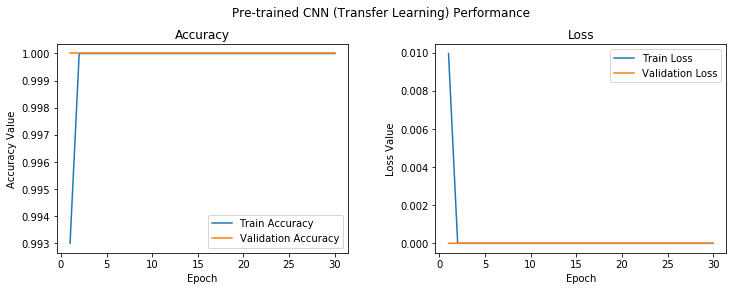

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model.save('cats_dogs_tlearn_basic_cnn.h5')

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 8192)              14714688  
_________________________________________________________________
dense_4 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 19,172,673
Trainable params: 4,457,985
Non-trainable params: 14,714,688
________________________________________________________

In [0]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
 76/100 [=====================>........] - ETA: 1:15 - loss: 0.0309 - acc: 0.9965

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model.save('cats_dogs_tlearn_img_aug_cnn.h5')

In [0]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: [<tf.Variable 'block4_conv1/kernel:0' shape=(3, 3, 256, 512) dtype=float32_ref>, <tf.Variable 'block4_conv1/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block4_conv2/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block4_conv2/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block4_conv3/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block4_conv3/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block5_conv1/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv1/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block5_conv2/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv2/bias:0' shape=(512,) dtype=float32_ref>, <tf.Variable 'block5_conv3/kernel:0' shape=(3, 3, 512, 512) dtype=float32_ref>, <tf.Variable 'block5_conv3/bias:0' shape=(512,) dtype=float32_ref>]


In [0]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.topology.InputLayer object at 0x7f26c86b2518>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7f277c9fc080>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7f26c86b26d8>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7f26c86e6c88>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7f26c867dc18>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7f26c8690f28>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7f26c869e5c0>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7f26c863f828>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7f26c863f128>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7f26c86607b8>,block3_conv3,False


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 8192)              14714688  
_________________________________________________________________
dense_7 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 19,172,673
Trainable params: 17,437,185
Non-trainable params: 1,735,488
________________________________________________________

In [0]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 64s 642ms/step - loss: 0.6070 - acc: 0.6547 - val_loss: 0.4029 - val_acc: 0.8250
Epoch 2/100
100/100 [==============================] - 63s 630ms/step - loss: 0.3976 - acc: 0.8103 - val_loss: 0.2273 - val_acc: 0.9030
Epoch 3/100
100/100 [==============================] - 63s 631ms/step - loss: 0.3440 - acc: 0.8530 - val_loss: 0.2221 - val_acc: 0.9150
Epoch 4/100
100/100 [==============================] - 63s 630ms/step - loss: 0.2948 - acc: 0.8773 - val_loss: 0.2226 - val_acc: 0.9170
Epoch 5/100
100/100 [==============================] - 63s 631ms/step - loss: 0.2514 - acc: 0.8933 - val_loss: 0.1539 - val_acc: 0.9440
Epoch 6/100
100/100 [==============================] - 63s 630ms/step - loss: 0.2396 - acc: 0.8980 - val_loss: 0.2022 - val_acc: 0.9290
Epoch 7/100
100/100 [==============================] - 63s 631ms/step - loss: 0.2209 - acc: 0.9107 - val_loss: 0.1316 - val_acc: 0.9460
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 63s 629ms/step - loss: 0.0345 - acc: 0.9897 - val_loss: 0.1929 - val_acc: 0.9650
Epoch 62/100
100/100 [==============================] - 63s 628ms/step - loss: 0.0435 - acc: 0.9860 - val_loss: 0.1807 - val_acc: 0.9630
Epoch 63/100
100/100 [==============================] - 63s 627ms/step - loss: 0.0362 - acc: 0.9860 - val_loss: 0.2241 - val_acc: 0.9560
Epoch 64/100
100/100 [==============================] - 63s 629ms/step - loss: 0.0268 - acc: 0.9923 - val_loss: 0.1873 - val_acc: 0.9630
Epoch 65/100
100/100 [==============================] - 63s 628ms/step - loss: 0.0359 - acc: 0.9893 - val_loss: 0.1920 - val_acc: 0.9640
Epoch 66/100
100/100 [==============================] - 63s 627ms/step - loss: 0.0338 - acc: 0.9867 - val_loss: 0.2174 - val_acc: 0.9610
Epoch 67/100
100/100 [==============================] - 63s 629ms/step - loss: 0.0397 - acc: 0.9873 - val_loss: 0.1981 - val_acc: 0.9620
Epoch 68/100
100/100 [===================

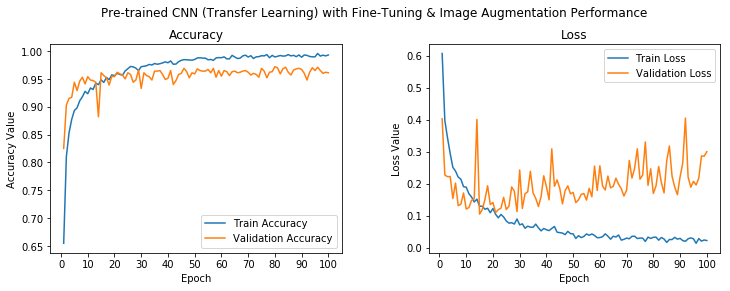

In [0]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Fine-Tuning & Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
model.save('cats_dogs_tlearn_finetune_img_aug_cnn.h5')